In [57]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

import cv2
import numpy as np
import matplotlib.pyplot as plt

import torch
from torch.utils.data import DataLoader

from glob import glob

from src.models import FPathPredictor, UNetFPathPredictor, VTFPredictor
from src.dataloaders import FPathDataset
from src.utils import inference
from src.preprocesses import VTFPreprocessor, ImagePreprocessor, InfodrawPreprocessor

In [20]:
vtf_paths = glob("/home/work/joono/VTFSketch/dataset/hard_data/vtfs/*")
vtf_paths.sort()
vtfs      = [VTFPreprocessor.get(vtf_path) for vtf_path in vtf_paths]

img_paths = glob("/home/work/joono/VTFSketch/dataset/hard_data/imgs/*")
img_paths.sort()
imgs      = [ImagePreprocessor.get(img_path) for img_path in img_paths]

infodraw_paths = glob("/home/work/joono/VTFSketch/dataset/hard_data/infodraws/*")
infodraw_paths.sort()
infodraws  = [InfodrawPreprocessor.get(infodraw_path) for infodraw_path in infodraw_paths]

In [21]:
weight_path = "/home/work/joono/VTFSketch/VTFPredictor/d3luwo9n/checkpoints/best-checkpoint-val_f1score=0.7797408699989319.ckpt"

model = VTFPredictor.load_from_checkpoint(weight_path)

model = model.to("cuda")
model = model.eval()

In [64]:
index = 1

vtf, vtf_path = vtfs[index], vtf_paths[index]
img, img_path = imgs[index], img_paths[index]
infodraw, infodraw_path = infodraws[index], infodraw_paths[index]

print(f"{vtf_path=}, {img_path=}, {infodraw_path=}")

vtf = torch.tensor(vtf).to('cuda').unsqueeze(0)
img = torch.tensor(img).to('cuda').unsqueeze(0)
infodraw = torch.tensor(infodraw).to('cuda').unsqueeze(0)

print(f"{vtf.shape=}, {img.shape=}, {infodraw.shape=}")

with torch.no_grad():
    pred, result = model.inference(vtf=vtf, img=img, infodraw=infodraw)

result = result.cpu().numpy().squeeze()

cv2.imwrite(f"test.png", result * 255)

vtf_path='/home/work/joono/VTFSketch/dataset/hard_data/vtfs/bently_fpath_of_infodraw.npz', img_path='/home/work/joono/VTFSketch/dataset/hard_data/imgs/bently_input.png', infodraw_path='/home/work/joono/VTFSketch/dataset/hard_data/infodraws/bently_infodraw.png'
vtf.shape=torch.Size([1, 21, 1024, 2064]), img.shape=torch.Size([1, 3, 1024, 2064]), infodraw.shape=torch.Size([1, 1, 1024, 2064])


/tmp/ipykernel_1993186/388413648.py:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  img = torch.tensor(img).to('cuda').unsqueeze(0)
/tmp/ipykernel_1993186/388413648.py:11: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  infodraw = torch.tensor(infodraw).to('cuda').unsqueeze(0)
/home/work/joono/VTFSketch/src/models.py:55: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  result = torch.tensor(infodraw.clone().detach() > 0.5, dtype=torch.float32)


True

In [65]:
vtf = vtf.cpu().squeeze().numpy()
img = img.cpu().squeeze().numpy()
infodraw = infodraw.cpu().squeeze().numpy()
pred = pred.cpu().squeeze().numpy()

(-0.5, 2063.5, 1023.5, -0.5)

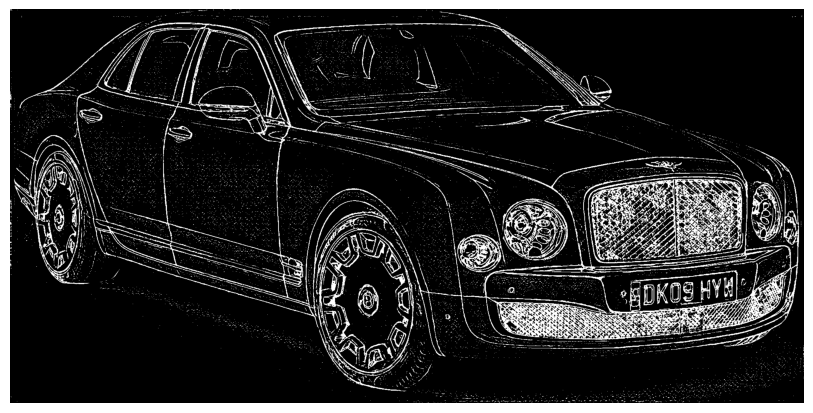

In [66]:
mask = infodraw  < 0.99
plt.figure(figsize=((infodraw.shape[0] / 100), infodraw.shape[1] / 100))
plt.imshow(mask, cmap='gray')
plt.axis('off')

(-0.5, 2063.5, 1023.5, -0.5)

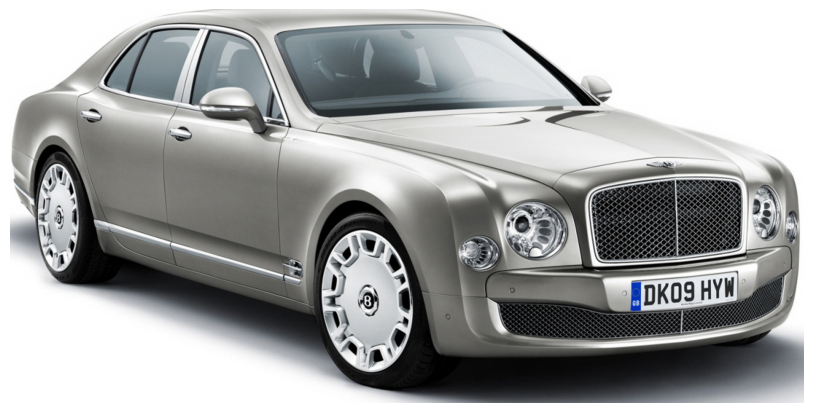

In [67]:
plt.figure(figsize=((img.shape[1] / 100), img.shape[2] / 100))
plt.imshow(img.transpose((1, 2, 0)))
plt.axis('off')

(-0.5, 2063.5, 1023.5, -0.5)

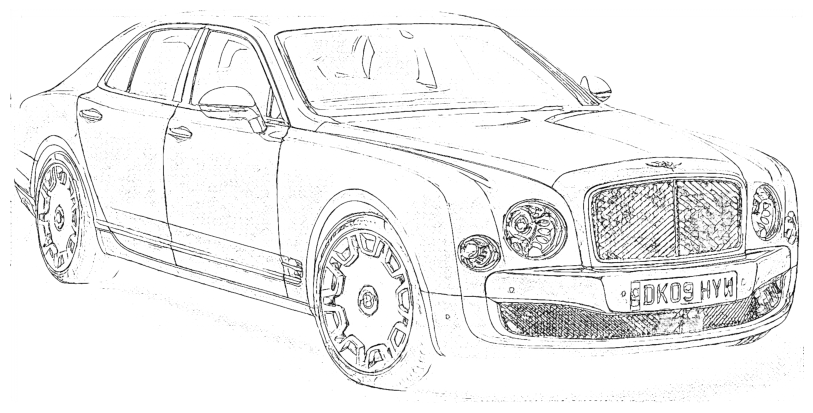

In [68]:
plt.figure(figsize=((infodraw.shape[0] / 100), infodraw.shape[1] / 100))
plt.imshow(infodraw, cmap='gray')
plt.axis('off')

(-0.5, 2063.5, 1023.5, -0.5)

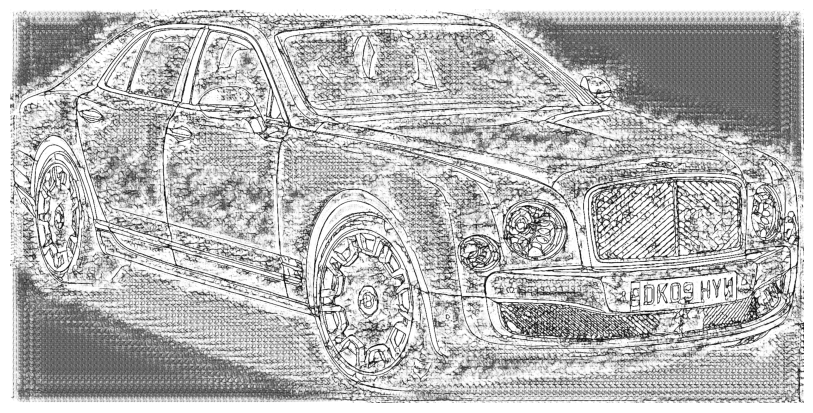

In [69]:
plt.figure(figsize=((pred.shape[0] / 100), pred.shape[1] / 100))
plt.imshow(pred, cmap='gray')
plt.axis('off')

(-0.5, 2063.5, 1023.5, -0.5)

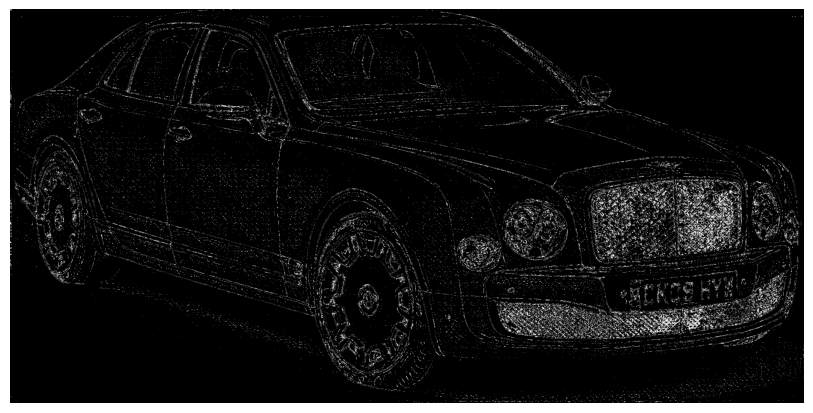

In [70]:
plt.figure(figsize=((pred.shape[0] / 100), pred.shape[1] / 100))
plt.imshow(pred * mask, cmap='gray')
plt.axis('off')

(-0.5, 2063.5, 1023.5, -0.5)

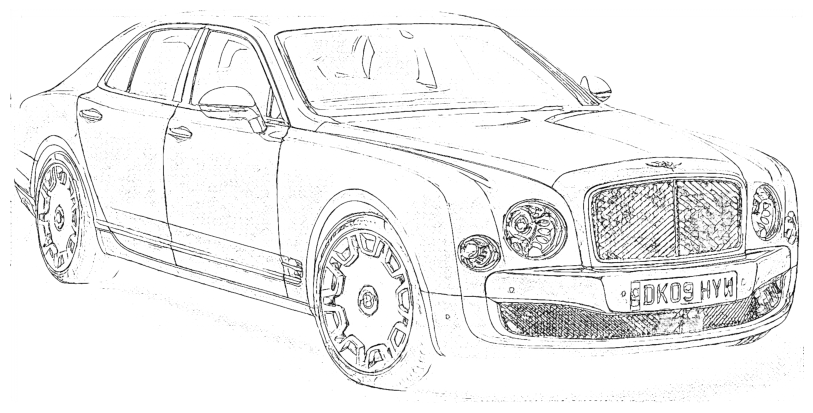

In [71]:
rresult = infodraw.copy()
rresult[np.where(mask)] = pred[np.where(mask)]

plt.figure(figsize=((rresult.shape[0] / 100), rresult.shape[1] / 100))
plt.imshow(rresult, cmap='gray')
plt.axis('off')

(-0.5, 2063.5, 1023.5, -0.5)

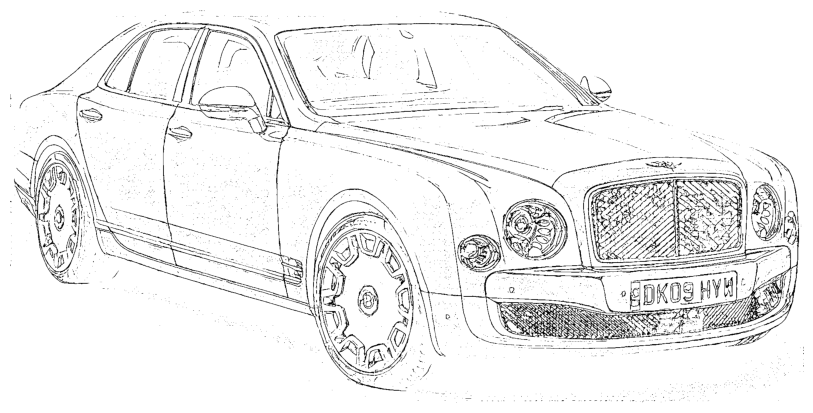

In [72]:
plt.figure(figsize=((result.shape[0] / 100), result.shape[1] / 100))
plt.imshow(result, cmap='gray')
plt.axis('off')

In [ ]:
plt.imshow(img.permute((1, 2, 0)))

In [ ]:
mask = torch.tensor(vtf[10, :, :] != 1.0)
print(mask.shape)
W, B = torch.sum(target), torch.sum(1-target)
mask_W, mask_B = mask * target, mask * (1-target)

In [ ]:
plt.figure(figsize=(10, 10))
plt.imshow(vtf[10, :, :], cmap='gray')
plt.axis('off')
cv2.imwrite("infodraw.png", vtf[10, :, :] * 255)

In [ ]:
plt.figure(figsize=(10, 10))
plt.imshow(mask.numpy(), cmap='gray')
plt.axis('off')
cv2.imwrite("mask.png", mask.numpy() * 255)

In [ ]:
plt.figure(figsize=(10, 10))
plt.imshow(mask_W[0], cmap='gray')
plt.axis('off')
cv2.imwrite("mask_W.png", mask_W[0].numpy() * 255)

In [ ]:
plt.figure(figsize=(10, 10))
plt.imshow(mask_B[0], cmap='gray')
plt.axis('off')
cv2.imwrite("mask_B.png", mask_B[0].numpy() * 255)

In [ ]:
plt.figure(figsize=(10, 10))
plt.imshow(target[0], cmap='gray')
plt.axis('off')
cv2.imwrite("target_W.png", target[0].numpy() * 255)

In [ ]:
plt.figure(figsize=(10, 10))
plt.imshow(1-target[0], cmap='gray')
plt.axis('off')
cv2.imwrite("target_B.png", (1-target[0]).numpy() * 255)

In [ ]:
import torch

In [ ]:
unpool = torch.nn.UpsamplingBilinear2d(scale_factor=2)

In [ ]:
a = torch.rand(3, 21, 512, 512)

In [ ]:
b = unpool(a)

In [ ]:
b.shape